In [32]:
#import resources

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import cartopy.feature as cfeature
import cartopy.mpl as cmpl

In [42]:
#Loading in the GLM data
#Only pulling from the desired locations (trial and error)

nc_file_GLM = nc.Dataset('/localdata/cases/20180519/GLM_data/GLM-00-00_20180520_043700_60_1src_056urad-dx_flash_extent.nc','r')

GLM_var = nc_file_GLM.variables['flash_extent_density'][:,:]
GLM_var = np.squeeze(GLM_var)
GLM_var[GLM_var==0] = np.nan

x_GLM = nc_file_GLM.variables['x'][:] 
y_GLM = nc_file_GLM.variables['y'][:]

x_locs = np.arange(1600,1851,1)
y_locs = np.arange(740,811,1)


GLM_iso_var = np.ones((len(x_GLM),len(y_GLM)))*np.nan
for i in x_locs:
    for j in y_locs:
        GLM_iso_var[i,j] = GLM_var[i,j]

In [58]:
#Loading in the MRMS Data
nc_file_MRMS = nc.Dataset('/localdata/cases/20180519/merged_radar/merged/MESH/00.25/20180520-043752.netcdf','r')

u_lat = nc_file_MRMS.Latitude #UPPER latitude
l_lon = nc_file_MRMS.Longitude #LEFT Longitude

spacing = 0.01 #MRMS spacing between points
data_crs = ccrs.PlateCarree()

#makes the variable from the netCDF file into a local variable that we can use when plotting data
MRMS_var = nc_file_MRMS.variables['MESH'][:,:]

#Getting the dimensions of x and y for plotting
len_x = len(MRMS_var[0,:])
len_y = len(MRMS_var[:,0])

#Setting array for x and y
x_MRMS = np.arange(l_lon, l_lon+(len_x*spacing), spacing) #W->E
y_MRMS = np.arange(u_lat, u_lat-(len_y*spacing), -spacing) #Because of plotting direction, latitudes are N->S

MRMS_var[MRMS_var<=0] = np.nan

In [65]:
#Getting the contours for the MRMS data
MRMS_var_true = nc_file_MRMS.variables['MESH'][:,:]
MRMS_var_true[MRMS_var_true<25] = False
MRMS_var_true[MRMS_var_true>=25] = True

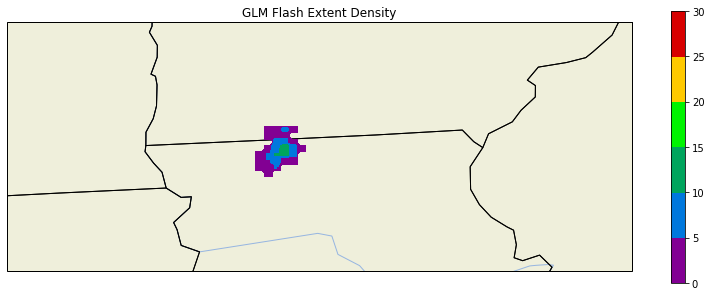

In [59]:
#Creating the GLM plot

bounds_GLM = np.arange(0, 35, 5)

plt.figure(figsize=(14, 5))
ax = plt.axes(projection=ccrs.Geostationary(-75, 35786023.0), transform=data_crs)
#ax.set_extent([-87, -80, 25, 32]) #FLORIDA
#ax.set_extent([-138, -60, 24, 55]) #CONUS
ax.set_extent([-97, -90, 39, 42]) #MIZZOURI
plt.contourf(x_GLM * 35786023.0, y_GLM * 35786023.0, GLM_iso_var.T, levels=bounds_GLM, cmap=plt.get_cmap('nipy_spectral'), zorder=10)
plt.title('GLM Flash Extent Density')

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, zorder=8)
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

we = plt.colorbar()

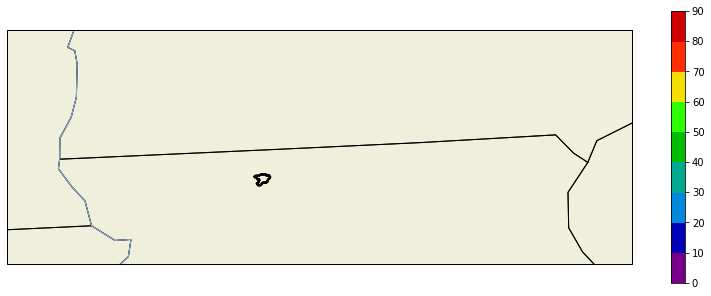

In [66]:
#Creating the MRMS plot

bounds_MRMS = np.arange(0,100,10)

plt.figure(figsize=(14,5))
ax = plt.axes(plt.axes(projection=ccrs.Geostationary(-75, 35786023.0)))
#one = ax.contourf(x_MRMS, y_MRMS, MRMS_var, zorder=10, levels=bounds_MRMS, transform=data_crs, cmap=plt.get_cmap('nipy_spectral'))
ax.contour(x_MRMS, y_MRMS, MRMS_var_true, transform=data_crs, colors='k')
#ax.set_extent([-138, -60, 24, 55]) #CONUS
ax.set_extent([x_MRMS[0], x_MRMS[-1], y_MRMS[-1], y_MRMS[0]])
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS)
plt.colorbar(one)
plt.show()

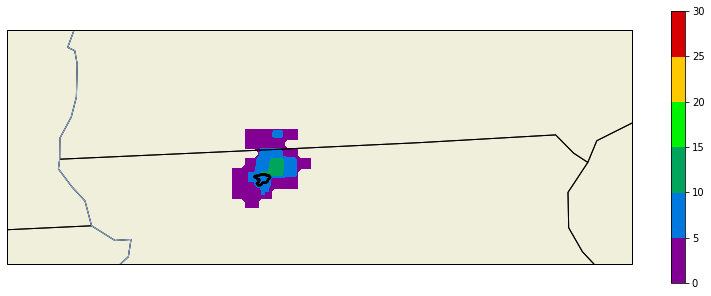

In [67]:
#Creating a figure with both GLM and MRMS
plt.figure(figsize=(14, 5))
ax = plt.axes(plt.axes(projection=ccrs.Geostationary(-75, 35786023.0)))
ax.contour(x_MRMS, y_MRMS, MRMS_var_true, transform=data_crs, colors='k')
bar = plt.contourf(x_GLM * 35786023.0, y_GLM * 35786023.0, GLM_iso_var.T, levels=bounds_GLM, cmap=plt.get_cmap('nipy_spectral'))

ax.set_extent([x_MRMS[0], x_MRMS[-1], y_MRMS[-1], y_MRMS[0]])
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS)

plt.colorbar(bar)